# PLOTTING DATAFRAME

In [7]:
!pip install pickle5
import pandas as pd
import pickle5
df = pickle5.load( open( "/content/drive/MyDrive/detect_melanoma/dataset/ISICArchive/dataframe.pkl", "rb" ) )
df

,_id,_modelType,created,name,updated,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,dataset.license,dataset.name,dataset.updated,meta.acquisition.image_type,meta.acquisition.pixelsX,meta.acquisition.pixelsY,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.melanocytic,meta.clinical.sex,meta.clinical.clin_size_long_diam_mm,meta.clinical.family_hx_mm,meta.clinical.personal_hx_mm,meta.acquisition.dermoscopic_type,meta.clinical.nevus_type,meta.clinical.mel_class,meta.clinical.mel_thick_mm,meta.clinical.lesion_id,meta.clinical.patient_id,meta.clinical.mel_type,notes.tags,notes.reviewed.accepted,notes.reviewed.time,notes.reviewed.userId,mean,std
0,5436e3abbae478396759f0cf,image,2014-10-09T19:36:11.989000+00:00,ISIC_0000000,2015-02-23T02:48:17.495000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,2014-11-10T02:39:56.492000+00:00,dermoscopic,1022,767,55.0,anterior torso,benign,nevus,None,True,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Challenge 2018: Task 1-2: Training, Challenge...",True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,152.959283,72.724840
1,5436e3acbae478396759f0d1,image,2014-10-09T19:36:12.070000+00:00,ISIC_0000001,2015-02-23T02:48:27.455000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,2014-11-10T02:39:56.492000+00:00,dermoscopic,1022,767,30.0,anterior torso,benign,nevus,None,True,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Challenge 2018: Task 1-2: Training, Challenge...",True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,163.257274,32.119009
2,5436e3acbae478396759f0d3,image,2014-10-09T19:36:12.152000+00:00,ISIC_0000002,2015-02-23T02:48:37.249000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,2014-11-10T02:39:56.492000+00:00,dermoscopic,1022,767,60.0,upper extremity,malignant,melanoma,histopathology,True,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Challenge 2019: Training, Challenge 2016: Tra...",True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,159.456453,48.908345
3,5436e3acbae478396759f0d5,image,2014-10-09T19:36:12.233000+00:00,ISIC_0000003,2015-02-23T02:48:46.021000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,2014-11-10T02:39:56.492000+00:00,dermoscopic,1022,767,30.0,upper extremity,benign,nevus,None,True,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Challenge 2018: Task 1-2: Training, Challenge...",True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,175.462552,62.371847
4,5436e3acbae478396759f0d7,image,2014-10-09T19:36:12.315000+00:00,ISIC_0000004,2015-02-23T02:48:57.303000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,2014-11-10T02:39:56.492000+00:00,dermoscopic,1022,767,80.0,posterior torso,malignant,melanoma,histopathology,True,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Challenge 2018: Task 1-2: Training, Challenge...",True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,73.172931,81.865008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69440,5e8106c274440928c0be1936,image,2020-03-29T20:36:18.028000+00:00,ISIC_9999134,2020-03-29T20:36:18.028000+00:00,5d2f67e62d9b53036316e9ea,User KGJB,0,5faf0f171057cb63a161b631,Memorial Sloan Kettering Cancer Center contrib...,CC-BY-NC,ISIC 2020 Challenge - MSKCC contribution,2020-03-29T19:33:11.754000+00:00,NaN,2592,1936,50.0,posterior torso,benign,None,single image expert consensus,NaN,male,NaN,NaN,NaN,NaN,None,None,NaN,IL_2076932,IP_

In [22]:
df.keys()

Index(['_id', '_modelType', 'created', 'name', 'updated', 'creator._id',
       'creator.name', 'dataset._accessLevel', 'dataset._id',
       'dataset.description', 'dataset.license', 'dataset.name',
       'dataset.updated', 'meta.acquisition.image_type',
       'meta.acquisition.pixelsX', 'meta.acquisition.pixelsY',
       'meta.clinical.age_approx', 'meta.clinical.anatom_site_general',
       'meta.clinical.benign_malignant', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.melanocytic',
       'meta.clinical.sex', 'meta.clinical.clin_size_long_diam_mm',
       'meta.clinical.family_hx_mm', 'meta.clinical.personal_hx_mm',
       'meta.acquisition.dermoscopic_type', 'meta.clinical.nevus_type',
       'meta.clinical.mel_class', 'meta.clinical.mel_thick_mm',
       'meta.clinical.lesion_id', 'meta.clinical.patient_id',
       'meta.clinical.mel_type', 'notes.tags', 'notes.reviewed.accepted',
       'notes.reviewed.time', 'notes.reviewed.userId', 

In [8]:
number_records = len(list(df['meta.clinical.benign_malignant']))
number_rows = len(list(df.columns))
pd.DataFrame([number_records,number_rows],columns=["cardinality "]).rename(index={0: "records", 1: "columns"})

,cardinality
records,69445
columns,39


In [9]:
len(list(df['meta.clinical.benign_malignant']))

69445

In [10]:
pd.DataFrame(df.isna().sum(),columns=["sum of all null values "])

,sum of all null values
_id,0
_modelType,0
created,0
name,0
updated,0
creator._id,0
creator.name,0
dataset._accessLevel,0
dataset._id,0
dataset.description,0


In [11]:
df_benign_malignant_size_class = df.groupby('meta.clinical.benign_malignant', dropna=False).size()
df_benign_malignant_size_class

meta.clinical.benign_malignant
benign                     47684
indeterminate                 14
indeterminate/benign           3
indeterminate/malignant        2
malignant                   5714
NaN                        16028
dtype: int64

In [12]:
df_benign_malignant_cardinalita = pd.DataFrame(df_benign_malignant_size_class,columns=['cardinalità'])
df_benign_malignant_cardinalita

,cardinalità
meta.clinical.benign_malignant,
benign,47684
indeterminate,14
indeterminate/benign,3
indeterminate/malignant,2
malignant,5714
NaN,16028


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2604a14c90>],
      dtype=object)

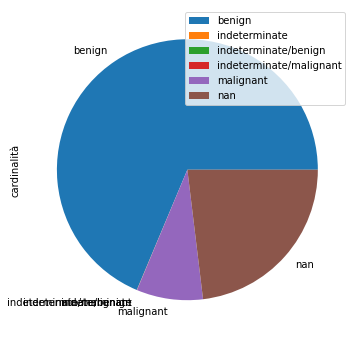

In [13]:
plot = df_benign_malignant_cardinalita.plot(kind='pie',figsize=(12,6), subplots=True)
plot

In [14]:
#df_benign_cardinalita = pd.DataFrame(df_benign_malignant_cardinalita,columns=['cardinalità'])
df_class_sub_class = df.groupby(['meta.clinical.benign_malignant','meta.clinical.diagnosis'], dropna=False).size()
temp = pd.DataFrame(df_class_sub_class,columns=["cardinalità"])
temp

cardinalità
meta.clinical.benign_malignant meta.clinical.diagnosis                        
benign                         actinic keratosis                             2
                               angiofibroma or fibrous papule                1
                               angioma                                      15
                               atypical melanocytic proliferation            3
                               basal cell carcinoma                          1
                               cafe-au-lait macule                           1
                               dermatofibroma                                7
                               lentigo NOS                                 111
                               lentigo simplex                              27
                               lichenoid keratosis                          32
                               nevus                                     27870
                               other                                        10
                               scar                                          1
                               seborrheic keratosis                        534
                               solar lentigo                                61
                               NaN                                       19008
indeterminate                  atypical melanocytic proliferation            9
                               nevus                                         5
indeterminate/benign           nevus                                         3
indeterminate/malignant        atypical melanocytic proliferation            2
malignant                      basal cell carcinoma                         67
                               melanoma                                   5598
                               seborrheic keratosis                          1
                               squamous cell carcinoma                      21
                               NaN                                          27
NaN                            actinic keratosis                           867
                               basal cell carcinoma                       3328
                               dermatofibroma                              239
                               pigmented benign keratosis                 1099
                               seborrheic keratosis                        929
                               solar lentigo                               209
                               squamous cell carcinoma                     635
                               vascular lesion                             253
                               NaN                                        8469

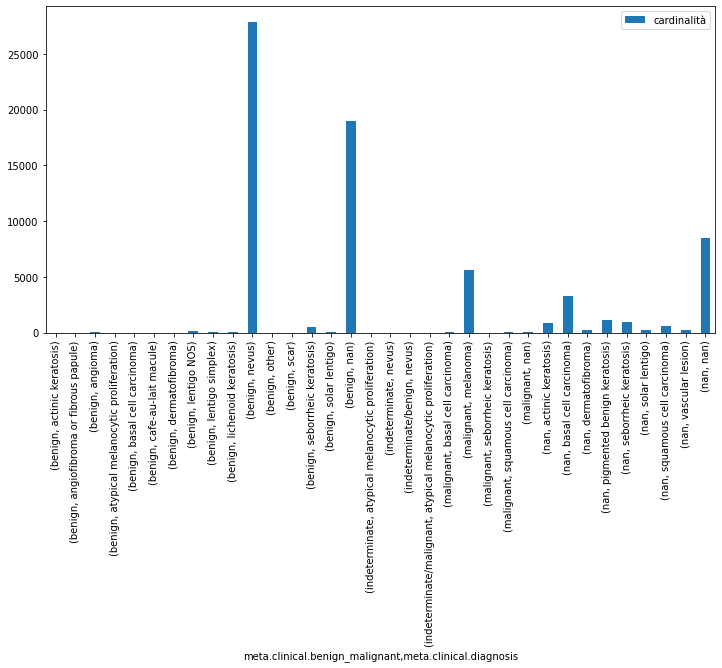

In [15]:
plot = temp.plot(kind='bar',figsize=(12,6))
#plot.tick_params(rotation=50)
plot

In [17]:
df_copy = df.copy()
df_copy = df_copy.drop(["meta.clinical.mel_thick_mm","dataset._accessLevel","mean","meta.acquisition.pixelsX","meta.acquisition.pixelsY","meta.clinical.clin_size_long_diam_mm","notes.reviewed.accepted","std"],axis=1)

df_type_acq = df_copy.groupby(['meta.acquisition.image_type'], dropna=False).size()
temp = pd.DataFrame(df_type_acq,columns=["cardinalità"])
temp

,cardinalità
meta.acquisition.image_type,
clinical,99
dermoscopic,28175
NaN,41171


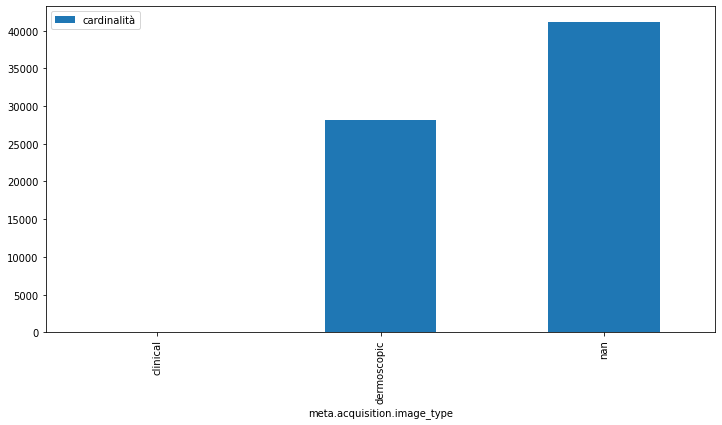

In [18]:
plot = temp.plot(kind='bar',figsize=(12,6))
#plot.tick_params(rotation=50)
plot

In [19]:
df_parti_del_corpo = df.groupby(['meta.clinical.anatom_site_general','meta.clinical.benign_malignant'], dropna=False).size()
temp = pd.DataFrame(df_parti_del_corpo,columns=["cardinalità"])
temp

cardinalità
meta.clinical.anatom_site_general meta.clinical.benign_malignant             
anterior torso                    benign                                 7808
                                  indeterminate                             3
                                  malignant                              1469
                                  NaN                                    1852
head/neck                         benign                                 2130
                                  indeterminate                             5
                                  malignant                              1083
                                  NaN                                    2856
lateral torso                     benign                                  616
                                  malignant                                24
lower extremity                   benign                                 9541
                                  indeterminate                             3
                                  malignant                              1014
                                  NaN                                    1290
oral/genital                      benign                                  143
                                  malignant                                23
                                  NaN                                      16
palms/soles                       benign                                  536
                                  malignant                               208
                                  NaN                                      29
posterior torso                   benign                                 7751
                                  indeterminate                             2
                                  indeterminate/benign                      3
                                  indeterminate/malignant                   2
                                  malignant                               671
                                  NaN                                     443
upper extremity                   benign                                 4905
                                  indeterminate                             1
                                  malignant                               942
                                  NaN                                     826
NaN                               benign                                14254
                                  malignant                               280
                                  NaN                                    8716

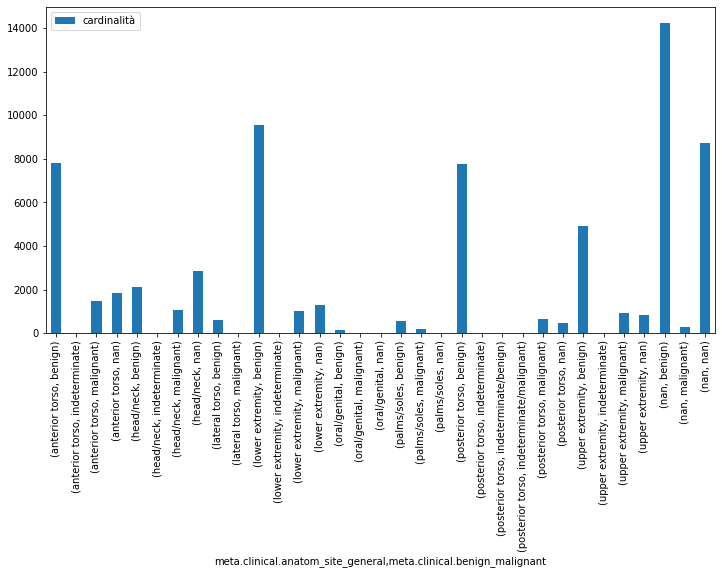

In [20]:
plot = temp.plot(kind='bar',figsize=(12,6))
#plot.tick_params(rotation=50)
plot

In [21]:
df_size_subclass = df.groupby('meta.clinical.diagnosis', dropna=False).size()
df_size_subclass

meta.clinical.diagnosis
actinic keratosis                       869
angiofibroma or fibrous papule            1
angioma                                  15
atypical melanocytic proliferation       14
basal cell carcinoma                   3396
cafe-au-lait macule                       1
dermatofibroma                          246
lentigo NOS                             111
lentigo simplex                          27
lichenoid keratosis                      32
melanoma                               5598
nevus                                 27878
other                                    10
pigmented benign keratosis             1099
scar                                      1
seborrheic keratosis                   1464
solar lentigo                           270
squamous cell carcinoma                 656
vascular lesion                         253
NaN                                   27504
dtype: int64

In [24]:
df_mean_age_group_by_main_class = pd.pivot_table(df_copy,index=["meta.clinical.benign_malignant"]).rename(columns={"meta.clinical.age_approx": "mean age"})
df_mean_age_group_by_main_class
#['meta.clinical.anatom_site_general',"meta.clinical.benign_malignant"])

,mean age
meta.clinical.benign_malignant,
benign,40.756500
indeterminate,52.142857
indeterminate/benign,36.666667
indeterminate/malignant,40.000000
malignant,60.785294


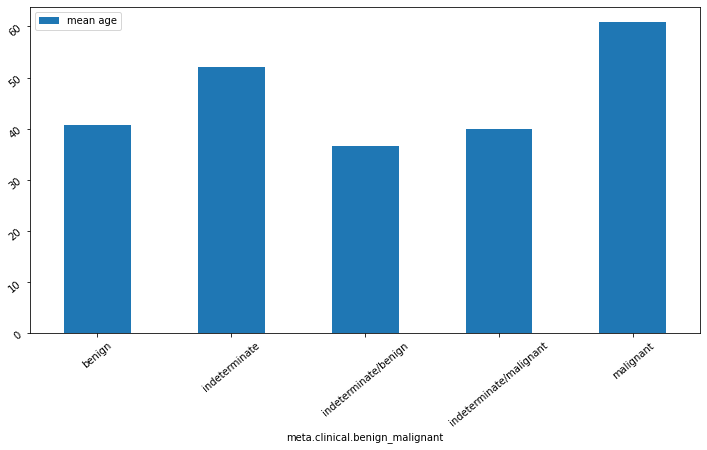

In [25]:
plot = df_mean_age_group_by_main_class.plot(kind='bar',figsize=(12,6))
plot.tick_params(rotation=40)
plot

In [26]:
df_mean_age_group_by_main_class_and_sex = pd.pivot_table(df_copy,index=["meta.clinical.benign_malignant","meta.clinical.sex"])
df_mean_age_group_by_main_class_and_sex

meta.clinical.age_approx
meta.clinical.benign_malignant meta.clinical.sex                          
benign                         female                            40.931556
                               male                              40.523088
indeterminate                  female                            50.625000
                               male                              54.166667
indeterminate/benign           female                            20.000000
                               male                              45.000000
indeterminate/malignant        female                            40.000000
malignant                      female                            58.039867
                               male                              62.784929

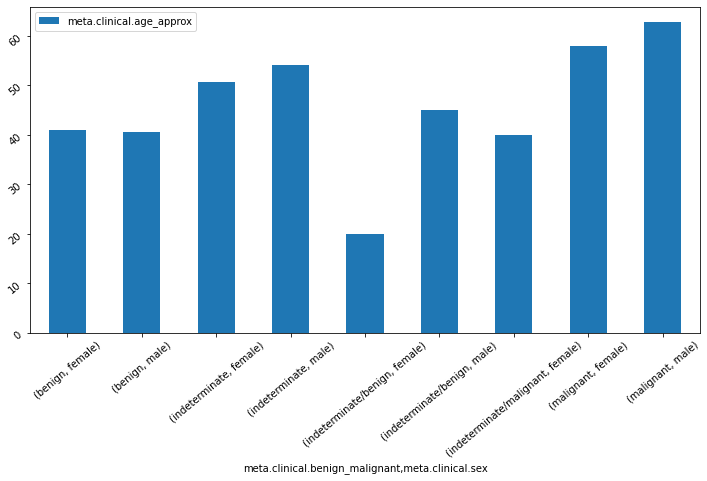

In [27]:
plot = df_mean_age_group_by_main_class_and_sex.plot(kind='bar',figsize=(12,6))
plot.tick_params(rotation=40)
plot

# PREPROCESSING IMAGE WITH COMPUTER VISION TECHNIQUES


Time for preprocessing with UNET : 0:00:00.748838
Time for preprocessing with UNET : 0:00:00.411821
Time for preprocessing with CV : 0:00:00.013145
Image name : ISIC_7904250	 | Anatom site : anterior torso	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 217.61818399234693	 | STD of origin image: 33.99643271285335


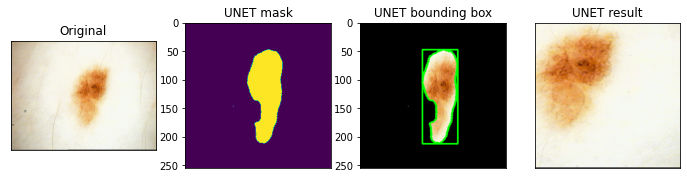

Mean of UNET result : R -> [239.85774075]	G -> [223.5276427]	 -> B[196.5853396];
STD of CV result : R -> [18.62075489]	G -> [42.05953468]	 -> B[64.35710609]
Mean of UNET grayscale result : [[225.34044165]]	 | STD of UNET grayscale result : [[36.37776585]]


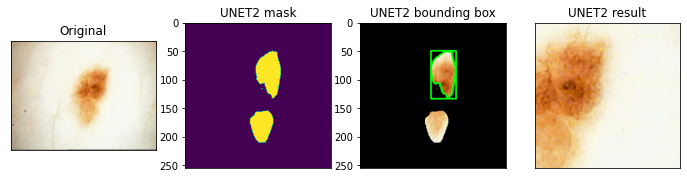

Mean of UNET2 result : R -> [238.54657605]	G -> [213.86013233]	 -> B[180.27052774];
STD of CV result : R -> [16.38215806]	G -> [49.11221045]	 -> B[74.98290141]
Mean of UNET2 grayscale result : [[217.40878109]]	 | STD of UNET2 grayscale result : [[41.73717956]]


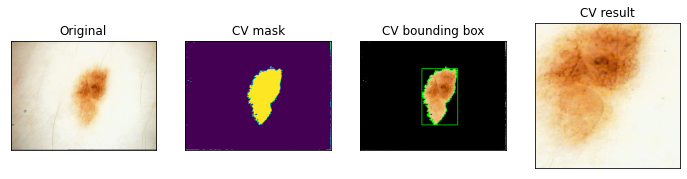

Mean of CV result : R -> [237.79669563]	G -> [208.73553093]	 -> B[169.42510364];
STD of CV result : R -> [16.25055624]	G -> [47.64218793]	 -> B[72.39825925]
Mean of CV grayscale result : [[212.94023039]]	 | STD of CV grayscale result : [[40.49611171]]


Time for preprocessing with UNET : 0:00:00.703770
Time for preprocessing with UNET : 0:00:00.199323
Time for preprocessing with CV : 0:00:00.045918
Image name : ISIC_0000362	 | Anatom site : nan	 | Benign or malignant : benign	 | Diagnosis : nevus	 | Mean of origin image : 122.07128906249999	 | STD of origin image: 32.14259052438518


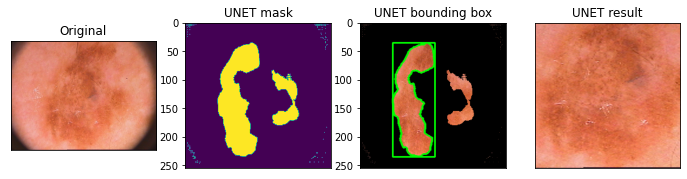

Mean of UNET result : R -> [222.92657844]	G -> [120.53226642]	 -> B[86.72704082];
STD of CV result : R -> [19.72339795]	G -> [21.14305404]	 -> B[24.02634258]
Mean of UNET grayscale result : [[147.29651626]]	 | STD of UNET grayscale result : [[20.22093689]]


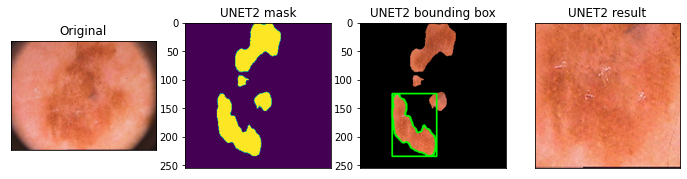

Mean of UNET2 result : R -> [227.74051339]	G -> [124.14989238]	 -> B[88.9674147];
STD of CV result : R -> [19.73878741]	G -> [22.26215955]	 -> B[25.15976126]
Mean of UNET2 grayscale result : [[151.11429767]]	 | STD of UNET2 grayscale result : [[20.77831156]]


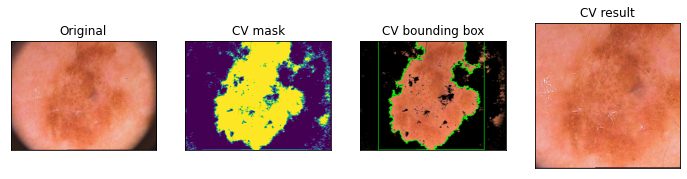

Mean of CV result : R -> [223.10371492]	G -> [124.05480708]	 -> B[92.99832589];
STD of CV result : R -> [20.16085084]	G -> [22.96363623]	 -> B[27.57964025]
Mean of CV grayscale result : [[150.13056043]]	 | STD of CV grayscale result : [[21.77361697]]


Time for preprocessing with UNET : 0:00:01.188863
Time for preprocessing with UNET : 0:00:00.565859
Time for preprocessing with CV : 0:00:00.729205
Image name : ISIC_8690825	 | Anatom site : upper extremity	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 159.33165258290816	 | STD of origin image: 15.928077177284274


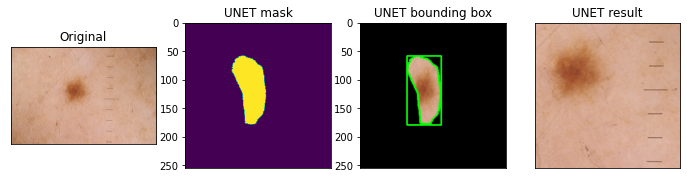

Mean of UNET result : R -> [209.93174027]	G -> [162.72183913]	 -> B[136.83765147];
STD of CV result : R -> [12.0015106]	G -> [18.20671932]	 -> B[23.56540926]
Mean of UNET grayscale result : [[173.89106346]]	 | STD of UNET grayscale result : [[16.82924432]]


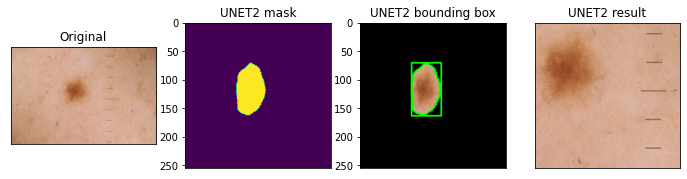

Mean of UNET2 result : R -> [209.08410395]	G -> [161.20725048]	 -> B[134.42930883];
STD of CV result : R -> [13.13517363]	G -> [20.09921372]	 -> B[25.79338083]
Mean of UNET2 grayscale result : [[172.47309471]]	 | STD of UNET2 grayscale result : [[18.53611409]]


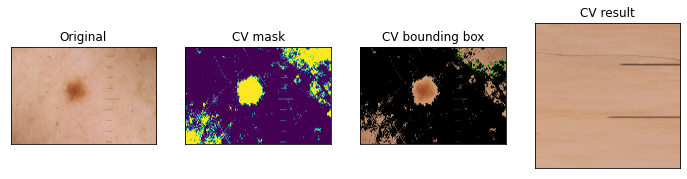

Mean of CV result : R -> [203.53378109]	G -> [159.53463807]	 -> B[130.96936783];
STD of CV result : R -> [9.34629826]	G -> [9.12068518]	 -> B[9.61801728]
Mean of CV grayscale result : [[169.44858099]]	 | STD of CV grayscale result : [[9.11910688]]


Time for preprocessing with UNET : 0:00:00.471103
Time for preprocessing with UNET : 0:00:00.195581
Time for preprocessing with CV : 0:00:00.033372
Image name : ISIC_4382153	 | Anatom site : posterior torso	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 71.53413982780611	 | STD of origin image: 22.587518246103883


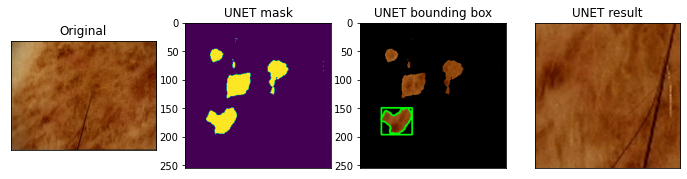

Mean of UNET result : R -> [137.9607382]	G -> [70.19784359]	 -> B[19.69443559];
STD of CV result : R -> [17.28551059]	G -> [18.11469128]	 -> B[12.41153733]
Mean of UNET grayscale result : [[84.70340402]]	 | STD of UNET grayscale result : [[16.99185264]]


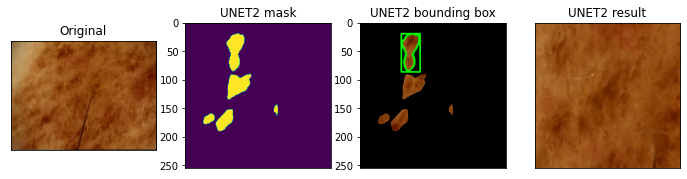

Mean of UNET2 result : R -> [144.64014668]	G -> [74.10805963]	 -> B[18.7080676];
STD of CV result : R -> [13.62897112]	G -> [14.81864492]	 -> B[11.26698315]
Mean of UNET2 grayscale result : [[88.88406808]]	 | STD of UNET2 grayscale result : [[13.92879938]]


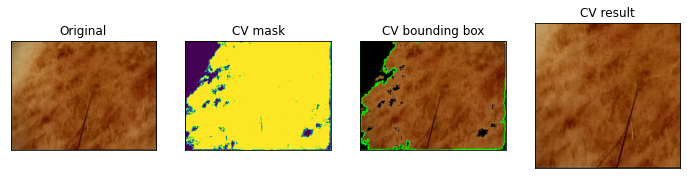

Mean of CV result : R -> [144.81102519]	G -> [77.57854353]	 -> B[23.71976642];
STD of CV result : R -> [19.37393232]	G -> [21.65223971]	 -> B[17.04422345]
Mean of CV grayscale result : [[91.54233099]]	 | STD of CV grayscale result : [[20.06267687]]


Time for preprocessing with UNET : 0:00:00.678256
Time for preprocessing with UNET : 0:00:00.260116
Time for preprocessing with CV : 0:00:00.246130
Image name : ISIC_2637496	 | Anatom site : lower extremity	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 118.16123246173468	 | STD of origin image: 10.59927260085626


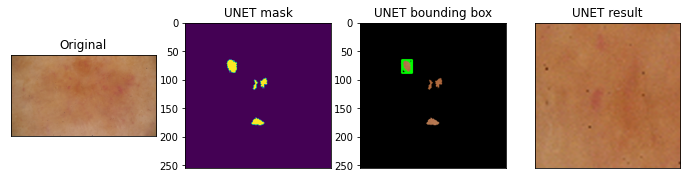

Mean of UNET result : R -> [178.11515466]	G -> [114.31584821]	 -> B[70.26444914];
STD of CV result : R -> [4.52667705]	G -> [8.16220197]	 -> B[8.17122841]
Mean of UNET grayscale result : [[128.36916055]]	 | STD of UNET grayscale result : [[6.62335884]]


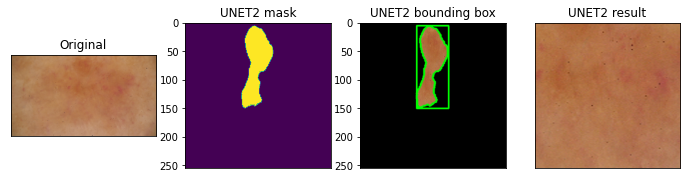

Mean of UNET2 result : R -> [178.18570631]	G -> [113.42885045]	 -> B[74.3963648];
STD of CV result : R -> [4.52319082]	G -> [8.23494345]	 -> B[8.89576685]
Mean of UNET2 grayscale result : [[128.34279337]]	 | STD of UNET2 grayscale result : [[6.70571968]]


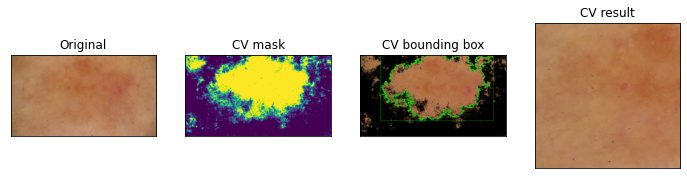

Mean of CV result : R -> [179.14748087]	G -> [121.83240992]	 -> B[80.08266901];
STD of CV result : R -> [4.94257248]	G -> [9.96635337]	 -> B[11.30796353]
Mean of CV grayscale result : [[134.21213329]]	 | STD of CV grayscale result : [[7.9997609]]


Time for preprocessing with UNET : 0:00:00.424638
Time for preprocessing with UNET : 0:00:00.229133
Time for preprocessing with CV : 0:00:00.048339
Image name : ISIC_0060668	 | Anatom site : upper extremity	 | Benign or malignant : benign	 | Diagnosis : nevus	 | Mean of origin image : 149.07932079081633	 | STD of origin image: 21.738251642844922


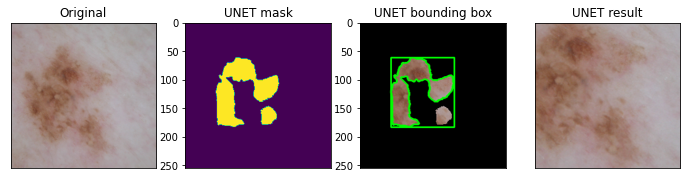

Mean of UNET result : R -> [164.13362962]	G -> [139.10263871]	 -> B[132.45727041];
STD of CV result : R -> [12.91290535]	G -> [25.11091603]	 -> B[33.64578238]
Mean of UNET grayscale result : [[145.83047672]]	 | STD of UNET grayscale result : [[22.29184112]]


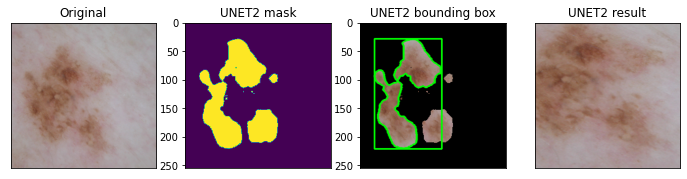

Mean of UNET2 result : R -> [163.48152503]	G -> [137.63295201]	 -> B[130.6768176];
STD of CV result : R -> [12.33442708]	G -> [23.518483]	 -> B[31.64656581]
Mean of UNET2 grayscale result : [[144.56835938]]	 | STD of UNET2 grayscale result : [[20.95637833]]


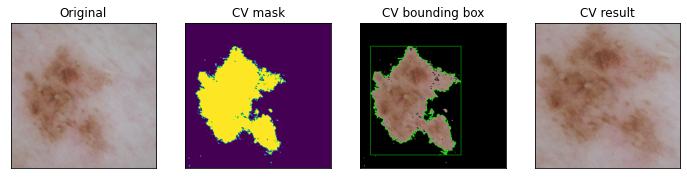

Mean of CV result : R -> [162.79589844]	G -> [137.08625638]	 -> B[129.68983179];
STD of CV result : R -> [12.02507279]	G -> [22.80457154]	 -> B[30.55587193]
Mean of CV grayscale result : [[143.93018575]]	 | STD of CV grayscale result : [[20.30075428]]


Time for preprocessing with UNET : 0:00:00.815645
Time for preprocessing with UNET : 0:00:00.522513
Time for preprocessing with CV : 0:00:00.526926
Image name : ISIC_3156486	 | Anatom site : anterior torso	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 185.39506935586732	 | STD of origin image: 20.747459168417066


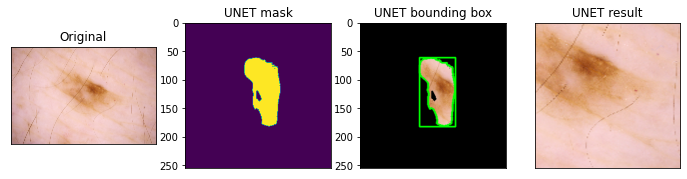

Mean of UNET result : R -> [232.81463249]	G -> [185.34388951]	 -> B[165.65082908];
STD of CV result : R -> [14.28450113]	G -> [23.44218881]	 -> B[39.66147722]
Mean of UNET grayscale result : [[197.29950574]]	 | STD of UNET grayscale result : [[22.37554112]]


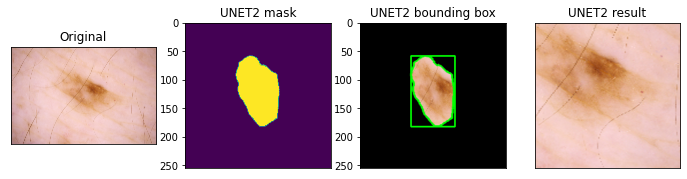

Mean of UNET2 result : R -> [233.47257653]	G -> [186.15575175]	 -> B[166.58793048];
STD of CV result : R -> [13.73707668]	G -> [22.55252064]	 -> B[38.31580413]
Mean of UNET2 grayscale result : [[198.0798589]]	 | STD of UNET2 grayscale result : [[21.53505768]]


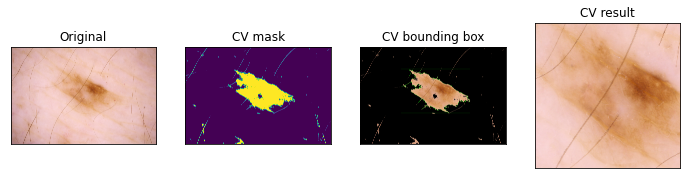

Mean of CV result : R -> [228.68767937]	G -> [176.82413903]	 -> B[148.1569874];
STD of CV result : R -> [17.03664351]	G -> [27.29465169]	 -> B[43.81713699]
Mean of CV grayscale result : [[189.07770647]]	 | STD of CV grayscale result : [[25.94465955]]


Time for preprocessing with UNET : 0:00:00.443768
Time for preprocessing with UNET : 0:00:00.189860
Time for preprocessing with CV : 0:00:00.030524
Image name : ISIC_0033433	 | Anatom site : lower extremity	 | Benign or malignant : benign	 | Diagnosis : nevus	 | Mean of origin image : 127.81114477040815	 | STD of origin image: 38.16945342680765


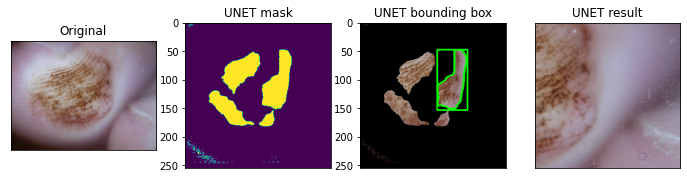

Mean of UNET result : R -> [147.30805564]	G -> [126.62918527]	 -> B[135.752272];
STD of CV result : R -> [18.57027672]	G -> [25.82519354]	 -> B[35.033546]
Mean of UNET grayscale result : [[133.8544324]]	 | STD of UNET grayscale result : [[24.02871202]]


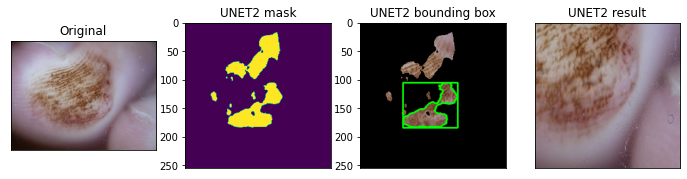

Mean of UNET2 result : R -> [145.42263233]	G -> [120.25430485]	 -> B[121.83733259];
STD of CV result : R -> [18.91138753]	G -> [26.30272852]	 -> B[34.82833503]
Mean of UNET2 grayscale result : [[127.96354831]]	 | STD of UNET2 grayscale result : [[24.37614888]]


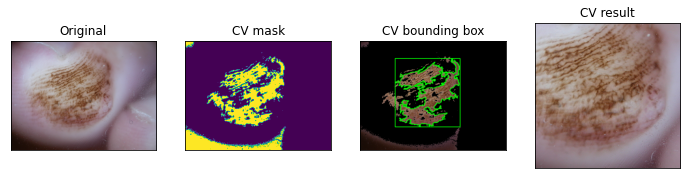

Mean of CV result : R -> [151.03374123]	G -> [125.53521604]	 -> B[120.81453284];
STD of CV result : R -> [20.83364333]	G -> [30.97150901]	 -> B[39.21337497]
Mean of CV grayscale result : [[132.62262835]]	 | STD of CV grayscale result : [[28.40143046]]


Time for preprocessing with UNET : 0:00:00.962480
Time for preprocessing with UNET : 0:00:00.539197
Time for preprocessing with CV : 0:00:00.499201
Image name : ISIC_7234522	 | Anatom site : posterior torso	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 186.47016501913265	 | STD of origin image: 21.9274150358524


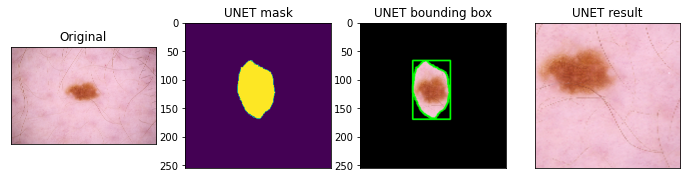

Mean of UNET result : R -> [234.53250558]	G -> [180.68090322]	 -> B[191.69909917];
STD of CV result : R -> [15.63972838]	G -> [27.48245104]	 -> B[42.2648726]
Mean of UNET grayscale result : [[198.0409957]]	 | STD of UNET grayscale result : [[25.50697163]]


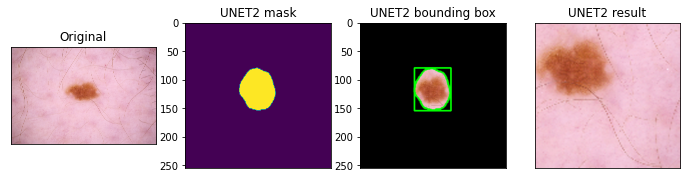

Mean of UNET2 result : R -> [233.46599968]	G -> [178.30157844]	 -> B[187.76761798];
STD of CV result : R -> [17.06410482]	G -> [29.9597155]	 -> B[46.13705235]
Mean of UNET2 grayscale result : [[195.87635523]]	 | STD of UNET2 grayscale result : [[27.83781628]]


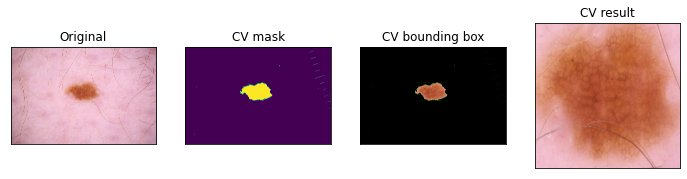

Mean of CV result : R -> [209.362783]	G -> [133.33858817]	 -> B[114.95721062];
STD of CV result : R -> [23.05380625]	G -> [37.884771]	 -> B[54.54205644]
Mean of CV grayscale result : [[153.98517219]]	 | STD of CV grayscale result : [[35.18937497]]


Time for preprocessing with UNET : 0:00:00.793183
Time for preprocessing with UNET : 0:00:00.440433
Time for preprocessing with CV : 0:00:00.367037
Image name : ISIC_7545340	 | Anatom site : posterior torso	 | Benign or malignant : benign	 | Diagnosis : None	 | Mean of origin image : 200.952467315051	 | STD of origin image: 22.204047452323618


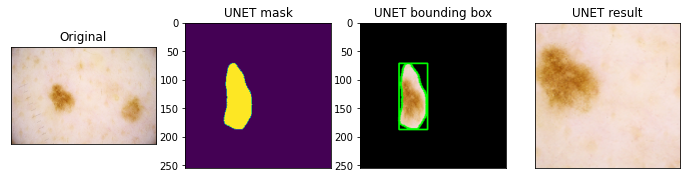

Mean of UNET result : R -> [236.89642459]	G -> [208.87553811]	 -> B[187.02598852];
STD of CV result : R -> [14.44520396]	G -> [25.36901356]	 -> B[46.07900125]
Mean of UNET grayscale result : [[214.76309391]]	 | STD of UNET grayscale result : [[24.34957093]]


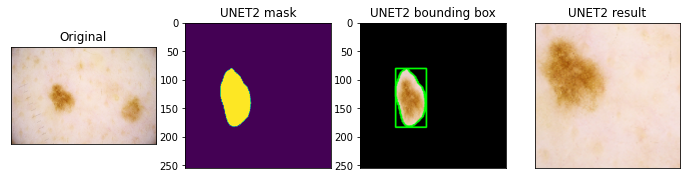

Mean of UNET2 result : R -> [236.3227838]	G -> [208.06746253]	 -> B[185.61296237];
STD of CV result : R -> [14.66343977]	G -> [25.72320601]	 -> B[46.75100388]
Mean of UNET2 grayscale result : [[213.95629385]]	 | STD of UNET2 grayscale result : [[24.69621034]]


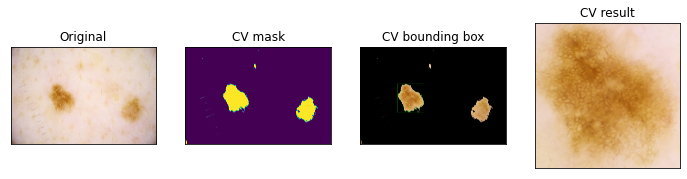

Mean of CV result : R -> [218.49724968]	G -> [175.12077487]	 -> B[123.6392897];
STD of CV result : R -> [20.19041096]	G -> [34.47376931]	 -> B[60.55602511]
Mean of CV grayscale result : [[182.23674665]]	 | STD of CV grayscale result : [[33.01406164]]




In [28]:
import os, random
import numpy as np
from datetime import datetime

def read_in_rgb(path):
    imm = cv2.imread(path)
    return cv2.cvtColor(imm, cv2.COLOR_BGR2RGB)

def mole_detect(origin_image_rgb, mask, delta):

    # if this function is call from unet_preprocessing, the contours is only one always
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contour = None
    max_area = 0
    for c in contours:
        area = cv2.contourArea(c)
        # print(area)
        if area > max_area:
            max_area = area
            contour = c
    boundRect = cv2.boundingRect(contour)

    output = cv2.bitwise_and(origin_image_rgb, origin_image_rgb, mask=mask)
    r = cv2.drawContours(image=output, contours=contour, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    rectangle = cv2.rectangle(r, (int(boundRect[0]), int(boundRect[1])),(int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0, 255, 0), 2)

    x1, y1, w, h = boundRect
    
    x2 = x1 + w + delta
    y2 = y1 + h + delta

    if x1 - delta <= 0 : 
      x1 = 0 + delta

    if x2 >= origin_image_rgb.shape[0]:
      x2 = origin_image_rgb.shape[0]# - w - delta
    
    if y1 - delta <= 0 : 
      y1 = 0 + delta

    if y2 >= origin_image_rgb.shape[1]:
      y2 = origin_image_rgb.shape[1]# - h - delta
    
    #print(y1-delta, y1+h+delta, x1-delta, x1+w+delta)
    #print(x1,x2,y1,y2)
    f = origin_image_rgb[y1:y2, x1:x2]
    k = cv2.resize(f, (224, 224), interpolation=cv2.INTER_CUBIC)
    return mask, rectangle, k

def unet_preprocessing(path, model, delta):
    start=datetime.now()
    original = read_in_rgb(path)
    original = cv2.resize(original, (256, 256), interpolation=cv2.INTER_CUBIC)
    img_to_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    img_norm = np.expand_dims(normalize(np.array(img_to_gray), axis=1), 2)
    img_norm = img_norm[:, :, 0][:, :, None]
    to_input = np.expand_dims(img_norm, 0)
    # Predict and threshold for values above 0.5 probability
    # Change the probability threshold to low value (e.g. 0.05) for watershed demo.
    prediction_mask = (model.predict(to_input)[0, :, :, 0] > 0.2).astype(np.uint8)
    m, r, k = mole_detect(original, prediction_mask, delta)
    print("Time for preprocessing with UNET : {}".format(datetime.now()-start))
    return m, r, k

def cv_preprocessing(path, delta):
    start=datetime.now()
    original = read_in_rgb(path)
    #per levare il rumore
    #dst = cv2.fastNlMeansDenoisingColored(original, None, 10, 10, 7, 21)

    #per levare i peli
    #grayScale = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    #kernel = cv2.getStructuringElement(1, (17, 17))
    #blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    #_, threshold = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    #final_image = cv2.inpaint(original, threshold, 1, cv2.INPAINT_TELEA)
   
    # Convert to HSV colourspace and extract just the Saturation
    #saturation = cv2.cvtColor(final_image, cv2.COLOR_RGB2HSV)[..., 1]
    saturation = cv2.cvtColor(original, cv2.COLOR_RGB2HSV)[..., 1]
    # Find best (Otsu) threshold to divide black from white, and apply it
    ret, mask = cv2.threshold(saturation, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    m, r, k = mole_detect(original, mask, delta)
    print("Time for preprocessing with CV : {}".format(datetime.now()-start))
    return m, r, k

import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import normalize
from keras.models import load_model

model = load_model('/content/drive/MyDrive/detect_melanoma/unet_model.hdf5')
model2 = load_model('/content/drive/MyDrive/detect_melanoma/unet_models/unet_model_7epochs.hdf5')
names = list(df["name"])

for i in range(10):
  if i > 10 : 
    break
  path = "/content/drive/MyDrive/detect_melanoma/dataset/ISICArchive/benign/nevus/"+str(random.choice(os.listdir("/content/drive/MyDrive/detect_melanoma/dataset/ISICArchive/benign/nevus/")))
  
  unet_delta = 50
  unet_mask, unet_bounding_box, unet_result = unet_preprocessing(path, model, unet_delta)

  unet2_mask, unet2_bounding_box, unet2_result = unet_preprocessing(path, model2, unet_delta)

  cv_delta = 50
  cv_mask, cv_bounding_box, cv_result = cv_preprocessing(path, cv_delta)

  name = str(path).split("/")[-1].split(".")[0]

  pos = names.index(name)
  anatom_site= df.iloc[pos]["meta.clinical.anatom_site_general"]
  b_or_m = df.iloc[pos]["meta.clinical.benign_malignant"]
  diagnosis = df.iloc[pos]["meta.clinical.diagnosis"]
  mean = df.iloc[pos]["mean"]
  std = df.iloc[pos]["std"]

  unet_mean, unet_std = cv2.meanStdDev(unet_result)
  unet_mean_grayscale , unet_std_grayscale = cv2.meanStdDev(cv2.cvtColor(unet_result, cv2.COLOR_RGB2GRAY))

  print("Image name : {}\t | Anatom site : {}\t | Benign or malignant : {}\t | Diagnosis : {}\t | Mean of origin image : {}\t | STD of origin image: {}".format(name, anatom_site, b_or_m, diagnosis, mean, std))
  plt.figure(figsize=(12, 4))
  plt.subplot(141)
  plt.title('Original')
  plt.imshow(read_in_rgb(path))
  plt.xticks([])
  plt.yticks([])
  plt.subplot(142)
  plt.title('UNET mask')
  plt.imshow(unet_mask)
  plt.xticks([])
  plt.subplot(143)
  plt.title('UNET bounding box')
  plt.imshow(unet_bounding_box)
  plt.xticks([])
  plt.subplot(144)
  plt.title('UNET result')
  plt.imshow(unet_result)
  plt.xticks([])
  plt.yticks([])
  plt.show()

  print("Mean of UNET result : R -> {}\tG -> {}\t -> B{};\nSTD of CV result : R -> {}\tG -> {}\t -> B{}".format(unet_mean[0], unet_mean[1], unet_mean[2], unet_std[0], unet_std[1], unet_std[2]))
  print("Mean of UNET grayscale result : {}\t | STD of UNET grayscale result : {}".format(unet_mean_grayscale, unet_std_grayscale))
  
  
  unet2_mean, unet2_std = cv2.meanStdDev(unet2_result)
  unet2_mean_grayscale , unet2_std_grayscale = cv2.meanStdDev(cv2.cvtColor(unet2_result, cv2.COLOR_RGB2GRAY))

  plt.figure(figsize=(12, 4))
  plt.subplot(141)
  plt.title('Original')
  plt.imshow(read_in_rgb(path))
  plt.xticks([])
  plt.yticks([])
  plt.subplot(142)
  plt.title('UNET2 mask')
  plt.imshow(unet2_mask)
  plt.xticks([])
  plt.subplot(143)
  plt.title('UNET2 bounding box')
  plt.imshow(unet2_bounding_box)
  plt.xticks([])
  plt.subplot(144)
  plt.title('UNET2 result')
  plt.imshow(unet2_result)
  plt.xticks([])
  plt.yticks([])
  plt.show()

  print("Mean of UNET2 result : R -> {}\tG -> {}\t -> B{};\nSTD of CV result : R -> {}\tG -> {}\t -> B{}".format(unet2_mean[0], unet2_mean[1], unet2_mean[2], unet2_std[0], unet2_std[1], unet2_std[2]))
  print("Mean of UNET2 grayscale result : {}\t | STD of UNET2 grayscale result : {}".format(unet2_mean_grayscale, unet2_std_grayscale))
  
  cv_mean, cv_std = cv2.meanStdDev(cv_result)
  cv_mean_grayscale , cv_std_grayscale = cv2.meanStdDev(cv2.cvtColor(cv_result, cv2.COLOR_RGB2GRAY))

  plt.figure(figsize=(12, 4))
  plt.subplot(141)
  plt.title('Original')
  plt.imshow(read_in_rgb(path))
  plt.xticks([])
  plt.yticks([])
  plt.subplot(142)
  plt.title('CV mask')
  plt.imshow(cv_mask)
  plt.xticks([])
  plt.yticks([])
  plt.subplot(143)
  plt.title('CV bounding box')
  plt.imshow(cv_bounding_box)
  plt.xticks([])
  plt.yticks([])
  plt.subplot(144)
  plt.title('CV result')
  plt.imshow(cv_result)
  plt.xticks([])
  plt.yticks([])
  plt.show()
  print("Mean of CV result : R -> {}\tG -> {}\t -> B{};\nSTD of CV result : R -> {}\tG -> {}\t -> B{}".format(cv_mean[0], cv_mean[1], cv_mean[2], cv_std[0], cv_std[1], cv_std[2]))
  print("Mean of CV grayscale result : {}\t | STD of CV grayscale result : {}\n\n".format(cv_mean_grayscale, cv_std_grayscale))
